## Insurance prediction

#### Problem Statement

The goal of this project is to give people an estimate of how much they need based on
their individual health situation. 

After that, customers can work with any health
insurance carrier and its plans and perks while keeping the projected cost from our
study in mind. 

This can assist a person in concentrating on the health side of an
insurance policy rather han the ineffective part.

#### Approach:

The classical machine learning tasks like Data Exploration, Data Cleaning, Feature Engineering, Model Building and Model Testing. Try out different machine learning algorithms that’s best fit for the above case.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### Univariate Analysis

In [4]:
df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## EDA (Exploratory Data Analysis) 

In [5]:
numerical_features = [i for i in df.columns if df[i].dtype!='O']
numerical_features

['age', 'bmi', 'children', 'expenses']

In [6]:
categorical_features = [i for i in df.columns if df[i].dtype == 'O']
categorical_features

['sex', 'smoker', 'region']

In [7]:
import warnings
warnings.filterwarnings('ignore')

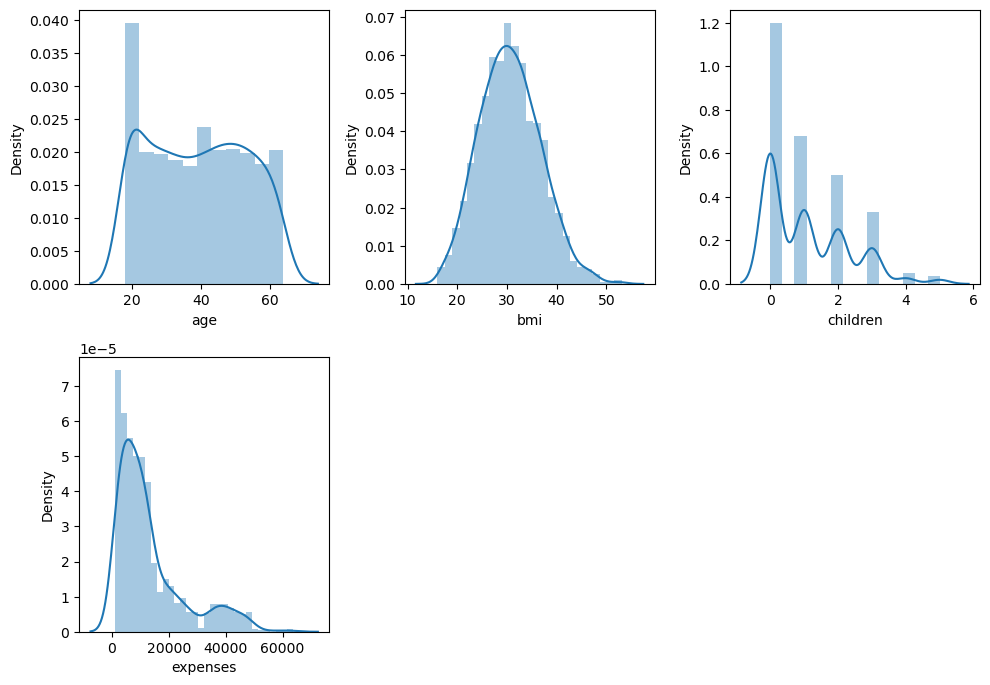

In [8]:
plt.figure(figsize=(10,10))
for i,col in enumerate(numerical_features):
    plt.subplot(3,3,i+1)
    sns.distplot(df[col])
    plt.xlabel(col)
    plt.tight_layout()

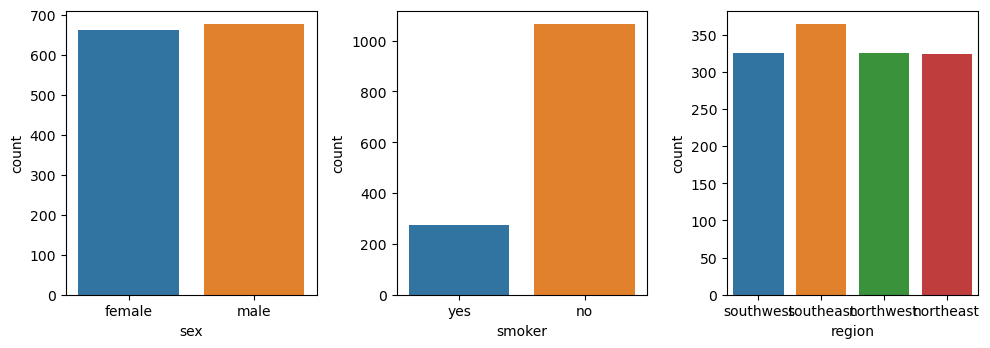

In [9]:
plt.figure(figsize=(10,10))
for i,col in enumerate(categorical_features):
    plt.subplot(3,3,i+1)
    sns.countplot(df[col])
    plt.xlabel(col)
    plt.tight_layout()

In [10]:
numerical_features[:-1]

['age', 'bmi', 'children']

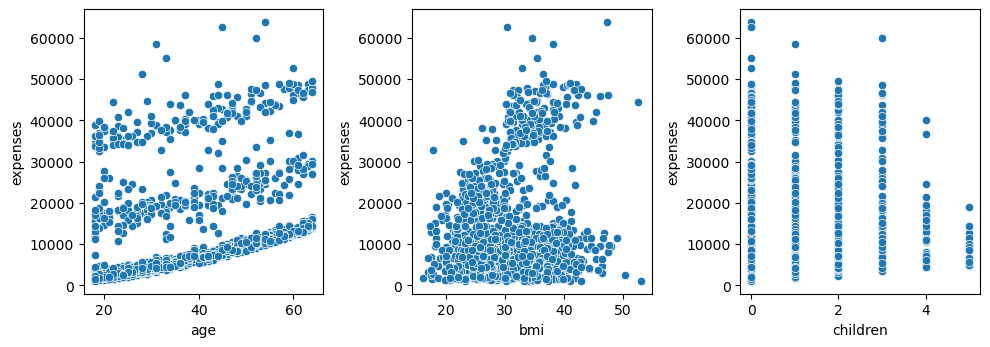

In [11]:
plt.figure(figsize=(10,10))
for i,col in enumerate(numerical_features[:-1]):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x= df[col],y=df[numerical_features[-1]])
    plt.xlabel(col)
    plt.tight_layout()

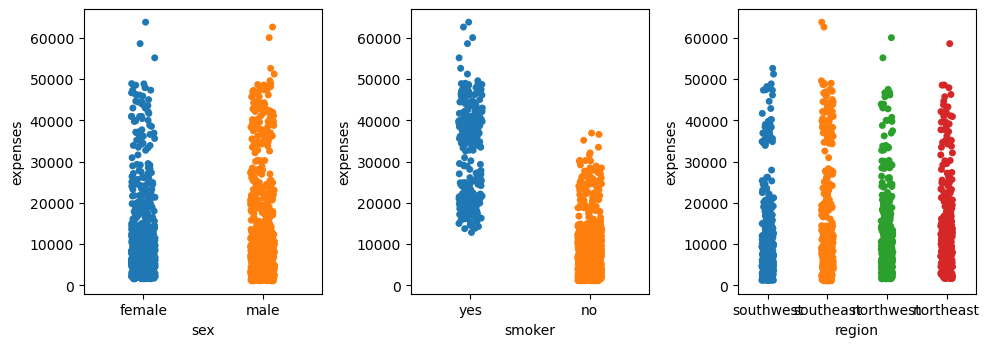

In [12]:
plt.figure(figsize=(10,10))
for i,col in enumerate(categorical_features):
    plt.subplot(3,3,i+1)
    sns.stripplot(x= df[col],y=df[numerical_features[-1]])
    plt.xlabel(col)
    plt.tight_layout()

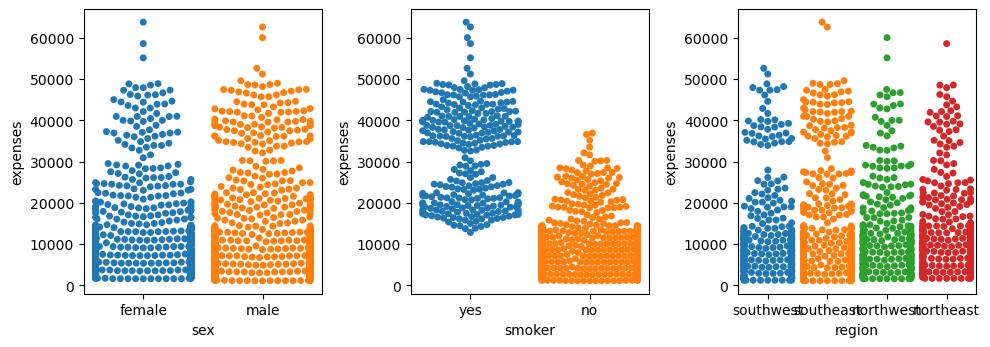

In [13]:
plt.figure(figsize=(10,10))
for i,col in enumerate(categorical_features):
    plt.subplot(3,3,i+1)
    sns.swarmplot(x= df[col],y=df[numerical_features[-1]])
    plt.xlabel(col)
    plt.tight_layout()

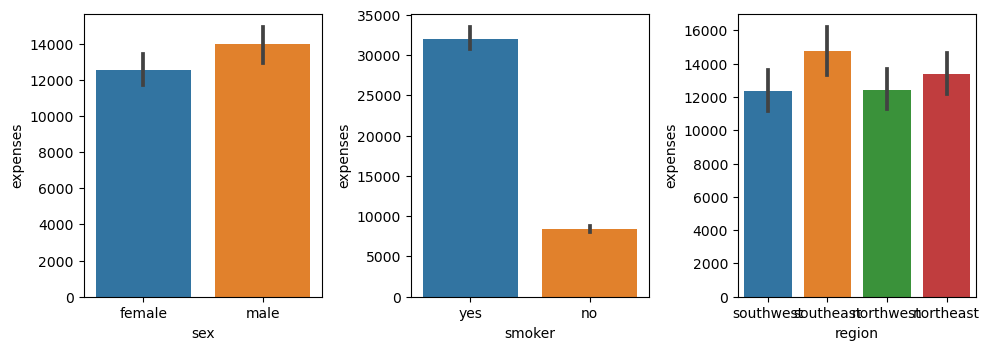

In [14]:
plt.figure(figsize=(10,10))
for i,col in enumerate(categorical_features):
    plt.subplot(3,3,i+1)
    sns.barplot(x= df[col],y=df[numerical_features[-1]])
    plt.xlabel(col)
    plt.tight_layout()

In [15]:
pd.DataFrame(df.groupby('sex')['sex'].count())

,sex
sex,
female,662
male,676


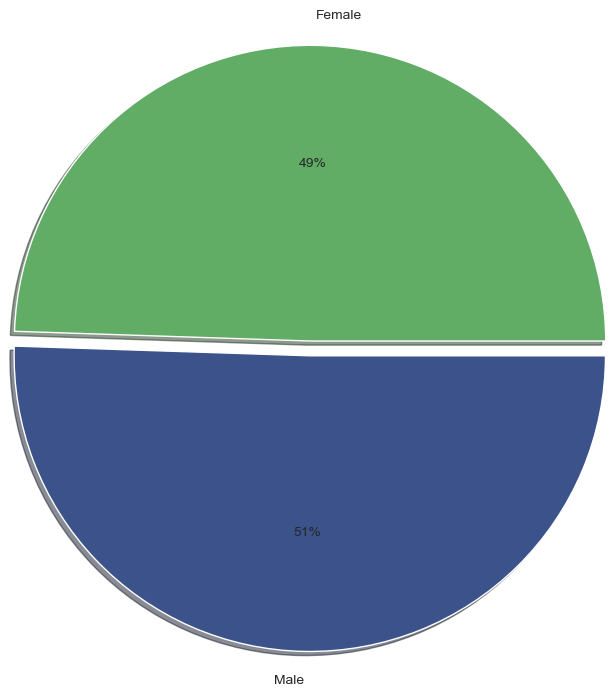

In [16]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
out_df=pd.DataFrame(df.groupby('sex')['sex'].count())
colors = ['#61ad66','#3b528b']
plt.pie(out_df['sex'],labels=['Female','Male'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.show()

In [17]:
df.groupby('smoker')['smoker'].count()

smoker
no     1064
yes     274
Name: smoker, dtype: int64

([<matplotlib.patches.Wedge at 0x171d8055cd0>,
 [Text(-0.8801026332278259, 0.6598631335250117, 'no'),
  Text(0.8801026332278258, -0.6598631335250118, 'yes')],
 [Text(-0.48005598176063224, 0.3599253455590972, '80%'),
  Text(0.48005598176063213, -0.3599253455590973, '20%')])

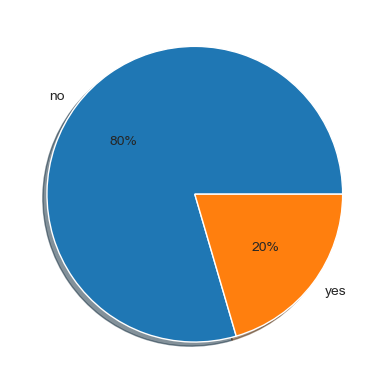

In [18]:
smoker_df = pd.DataFrame(df.groupby('smoker')['smoker'].count())
plt.pie(smoker_df['smoker'],labels=['no','yes'],autopct='%.0f%%',shadow=True)

In [19]:
df.groupby('region')['region'].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: region, dtype: int64

([<matplotlib.patches.Wedge at 0x171d8ac7340>,
 [Text(0.7967552650119277, 0.7584069143116859, 'northeast'),
  Text(-0.7201693465997107, 0.8314782692398798, 'northwest'),
  Text(-0.7967553005155169, -0.7584068770128791, 'southeast'),
  Text(0.7949722811641255, -0.7602756553913236, 'southwest')],
 [Text(0.4345937809155969, 0.413676498715465, '24%'),
  Text(-0.3928196435998421, 0.45353360140357074, '24%'),
  Text(-0.43459380028119104, -0.4136764783706613, '27%'),
  Text(0.43362124427134113, -0.414695812031631, '24%')])

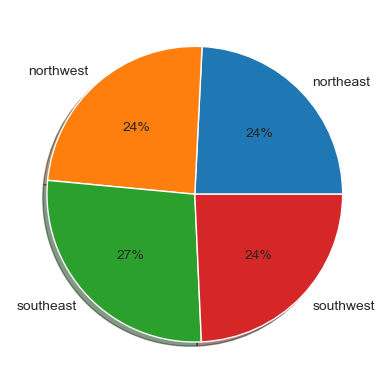

In [20]:
region_df = pd.DataFrame(df.groupby('region')['region'].count())
plt.pie(region_df['region'],labels=['northeast','northwest','southeast','southwest'],autopct='%.0f%%',shadow=True)

<AxesSubplot:xlabel='children', ylabel='count'>

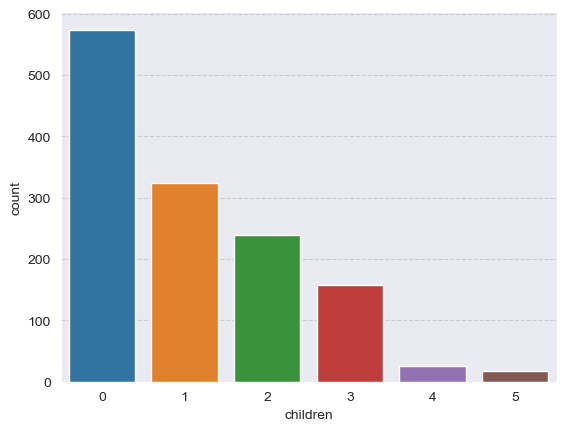

In [21]:
sns.countplot(df['children'])

<AxesSubplot:xlabel='children', ylabel='expenses'>

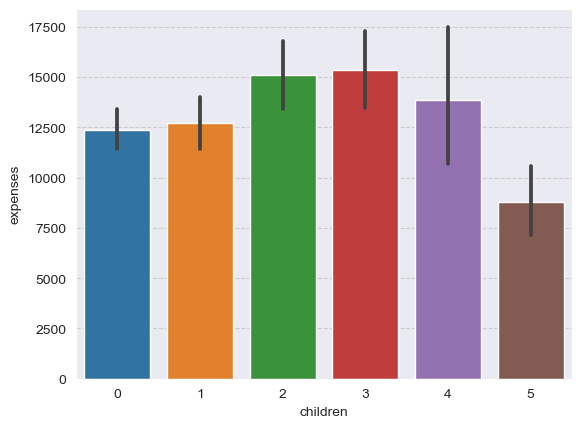

In [22]:
sns.barplot(x = df['children'],y=df['expenses'])

<AxesSubplot:>

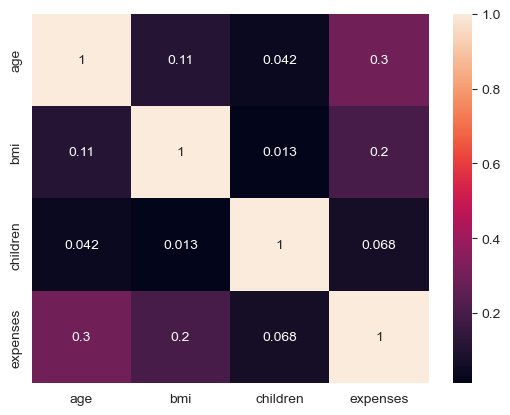

In [23]:
sns.heatmap(df.corr(),annot=True)

__Report:__

1. From above analysis we can see that __expenses__ is the target coloumn
2. __expenses__ is rightly skewed
3. Age is distributed some what normal distrubution, when we draw the scatter plot with expenses it has near linear relation ship.
4. BMI has the perfect normal distribution, the scatter plot with expenses it is having near linear relationship.
5. Childern is having the categorical variable so when we plot the barplot wiht expenses surprizingly the people with 3 childern has the more expenses comared to people having 5 childern.
6. Compared to female male are spending more on insurance.
7. Expenses for the smoker are higher then who doesn't smoke but more nonsmokers opt for the insurance
8. As per the given data southeast people are taking more new insurance compared to other regions.
9. From heatmap we can conclude that there is no multicoliner feature

### Before we are training the model we need to convert the categorical features to numerical features that can be done using label encoder 

In [24]:
categorical_features

['sex', 'smoker', 'region']

### preprocessing of Data

In [25]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [26]:
df[categorical_features].nunique()

sex       2
smoker    2
region    4
dtype: int64

In [27]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [28]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [29]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

__Report__

1. if we observe the abouve categorical featues (sex,smoker) has the 2 unique valules 
2. if we check the region it has 4 unique values.

In [30]:
a = dict(enumerate(df['sex'].unique()))
a

{0: 'female', 1: 'male'}

In [31]:
b = dict(enumerate(df['smoker'].unique()[::-1]))
b

{0: 'no', 1: 'yes'}

In [32]:
c = dict(enumerate(df['region'].unique()))
c

{0: 'southwest', 1: 'southeast', 2: 'northwest', 3: 'northeast'}

In [33]:
type(c)

dict

In [34]:
def val_to_key(d):
    if isinstance(d,dict):
        d = {value:key for key, value in d.items()}
    return d
    
    

In [35]:
g = {v:k for k,v in a.items()}
g

{'female': 0, 'male': 1}

In [36]:
val_to_key(a)

{'female': 0, 'male': 1}

In [37]:
val_to_key(b)

{'no': 0, 'yes': 1}

In [38]:
val_to_key(c)

{'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3}

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [45]:
df['sex'] = df['sex'].replace(val_to_key(a))
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [40]:

from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

for i in categorical_features:
    df[i]= label_encoder.fit_transform(df[i])

df.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


### Training and testing model

In [62]:
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
def performance(y_test,y_pred):
    '''
    This function measure the mean absolute error, mean square error, r2 score
    Returns: MSE, MAE, R2_score
    '''
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    RMSE = np.sqrt(MSE)
    r2 =  r2_score(y_test,y_pred)
    return MSE,MAE,RMSE,r2

In [43]:
def adj_r2score(score,X,y):
    '''
    This function measure the adjusted r2 value
    Returns: adj_r2 value of the model
    '''
    adjR = 1 - ( 1-score ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 )
    return adjR
    

In [67]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    cross_score = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        

        # Training set performance
        MSE_train,MAE_train,RMSE_train,r2_train = performance(y_train ,y_train_pred)
        adj_r2_train = adj_r2score(r2_train,X,y)
        
        # Test set performance
        MSE_test,MAE_test,RMSE_test,r2_test = performance(y_test, y_test_pred)
        adj_r2_test = adj_r2score(r2_test,X,y)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- MSE: {:.4f}".format(MSE_train))
        print('- MAE: {:.4f}'.format(MAE_train))
        print("- RMSE: {:.4f}".format(RMSE_train))
        print('- r2-score: {:.4f}'.format(r2_train))
        print('- adj-r2score: {:.4f}'.format(adj_r2_train))
        
        

        print('----------------------------------')

        print('Model performance for Test set')
        print('- MSE : {:.4f}'.format(MSE_test))
        print('- MAE : {:.4f}'.format(MAE_test))
        print('- RMSE : {:.4f}'.format(RMSE_test))
        print('- r2-score: {:.4f}'.format(r2_test))
        print('- adj-score: {:.4f}'.format(adj_r2_test))
        
        cost_list.append(adj_r2_test)
        
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list )), columns=['Model Name', 'AdjR']).sort_values(by=["AdjR"])
        
    return report

In [68]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [69]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [70]:
y = df['expenses']
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [71]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Linear Regression": LinearRegression(),
    "XGB Regressor": XGBRegressor(), 
    "AdaBoost Regressior": AdaBoostRegressor(),
    "Ridge regressor" : Ridge(alpha=0.1),
    "Lasso regressor" : Lasso(alpha=0.1)
}

In [72]:
robust_scaler = RobustScaler()
X1 = robust_scaler.fit_transform(X)

In [76]:
X1

array([[-0.83333333, -1.        , -0.29761905, -0.5       ,  1.        ,
         1.        ],
       [-0.875     ,  0.        ,  0.4047619 ,  0.        ,  0.        ,
         0.        ],
       [-0.45833333,  0.        ,  0.30952381,  1.        ,  0.        ,
         0.        ],
       ...,
       [-0.875     , -1.        ,  0.77380952, -0.5       ,  0.        ,
         0.        ],
       [-0.75      , -1.        , -0.54761905, -0.5       ,  0.        ,
         1.        ],
       [ 0.91666667, -1.        , -0.1547619 , -0.5       ,  1.        ,
        -1.        ]])

In [73]:
report_insu = evaluate_models(X1, y, models)

Random Forest
Model performance for Training set
- MSE: 3598894.6741
- MAE: 1058.6753
- RMSE: 1897.0753
- r2-score: 0.9751
- adj-r2score: 0.9750
----------------------------------
Model performance for Test set
- MSE : 21092395.9559
- MAE : 2501.2534
- RMSE : 4592.6459
- r2-score: 0.8641
- adj-score: 0.8635


Decision Tree
Model performance for Training set
- MSE: 244239.6868
- MAE: 29.5725
- RMSE: 494.2061
- r2-score: 0.9983
- adj-r2score: 0.9983
----------------------------------
Model performance for Test set
- MSE : 42805427.3060
- MAE : 3026.2846
- RMSE : 6542.5857
- r2-score: 0.7243
- adj-score: 0.7230


Gradient Boosting
Model performance for Training set
- MSE: 14787858.7537
- MAE: 2107.9518
- RMSE: 3845.4985
- r2-score: 0.8975
- adj-r2score: 0.8971
----------------------------------
Model performance for Test set
- MSE : 19361375.1386
- MAE : 2504.5318
- RMSE : 4400.1563
- r2-score: 0.8753
- adj-score: 0.8747


Linear Regression
Model performance for Training set
- MSE: 372770

In [74]:
report_insu

,Model Name,AdjR
1,Decision Tree,0.723035
6,Ridge regressor,0.782320
7,Lasso regressor,0.782342
3,Linear Regression,0.782345
5,AdaBoost Regressior,0.813349
4,XGB Regressor,0.841843
0,Random Forest,0.863526
2,Gradient Boosting,0.874726


__Report__

1. From the above report we can see that Gradient Boosting Adj-r2 score for test and train data having 87% and 89%.
2. RMSE for test data in Gradient Boosting is 4400 which is less among the all models
3. Hence we can consider this __Gradient boosting for implementation.__

In [78]:
#before we go we can test with we just see without the robust scaler and lazy learning we can find the results

# with out robust scaling
report_without_robust = evaluate_models(X, y, models)

Random Forest
Model performance for Training set
- MSE: 3504236.9235
- MAE: 1042.9562
- RMSE: 1871.9607
- r2-score: 0.9757
- adj-r2score: 0.9756
----------------------------------
Model performance for Test set
- MSE : 20865622.0441
- MAE : 2477.3090
- RMSE : 4567.8903
- r2-score: 0.8656
- adj-score: 0.8650


Decision Tree
Model performance for Training set
- MSE: 244239.6868
- MAE: 29.5725
- RMSE: 494.2061
- r2-score: 0.9983
- adj-r2score: 0.9983
----------------------------------
Model performance for Test set
- MSE : 48627803.5435
- MAE : 3167.8054
- RMSE : 6973.3639
- r2-score: 0.6868
- adj-score: 0.6854


Gradient Boosting
Model performance for Training set
- MSE: 14787858.7537
- MAE: 2107.9518
- RMSE: 3845.4985
- r2-score: 0.8975
- adj-r2score: 0.8971
----------------------------------
Model performance for Test set
- MSE : 19357218.2185
- MAE : 2504.7190
- RMSE : 4399.6839
- r2-score: 0.8753
- adj-score: 0.8748


Linear Regression
Model performance for Training set
- MSE: 372770

In [79]:
report_without_robust

,Model Name,AdjR
1,Decision Tree,0.685363
6,Ridge regressor,0.782320
7,Lasso regressor,0.782342
3,Linear Regression,0.782345
5,AdaBoost Regressior,0.828321
4,XGB Regressor,0.841629
0,Random Forest,0.864993
2,Gradient Boosting,0.874753


In [80]:
!pip install lazypredict

     ---------------------------------------- 1.0/1.0 MB 1.1 MB/s eta 0:00:00


In [82]:
X_train1, X_test1, y_train, y_test = train_test_split(X1,y,test_size=0.2,random_state=42)

In [83]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle

lazy_reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = lazy_reg.fit(X_train1, X_test1, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:09<00:00,  4.45it/s]


In [85]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.87,0.88,4391.87,0.06
LGBMRegressor,0.86,0.86,4584.49,0.08
RandomForestRegressor,0.86,0.86,4602.07,0.21
HistGradientBoostingRegressor,0.86,0.86,4612.62,0.31
BaggingRegressor,0.85,0.85,4827.66,0.01
ExtraTreesRegressor,0.84,0.85,4864.41,0.19
XGBRegressor,0.84,0.84,4973.53,0.07
AdaBoostRegressor,0.84,0.84,4989.39,0.02
KNeighborsRegressor,0.83,0.83,5069.12,0.01


__Report__

1. From lazypredict Gradient Boosting also possessing the good adjusted-R2 and r2.

In [86]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.87,0.88,4391.87,0.06
LGBMRegressor,0.86,0.86,4584.49,0.08
RandomForestRegressor,0.86,0.86,4602.07,0.21
HistGradientBoostingRegressor,0.86,0.86,4612.62,0.31
BaggingRegressor,0.85,0.85,4827.66,0.01
ExtraTreesRegressor,0.84,0.85,4864.41,0.19
XGBRegressor,0.84,0.84,4973.53,0.07
AdaBoostRegressor,0.84,0.84,4989.39,0.02
KNeighborsRegressor,0.83,0.83,5069.12,0.01
